In [1]:
# ------ Imports & data ------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv("data/raw/TMDB_movie_dataset_v11.csv")
df = pd.read_csv('data/processed/100k_subset.csv')
pd.set_option('display.max_columns', None)


In [2]:
# ------ Basic Info & Stats------
print(df.head())

   Unnamed: 0       id                                            title  \
0      831307   538416                            Vous seule que j'aime   
1       94983   126031                             A Woman Called Golda   
2     1139458  1041711                                       Satellites   
3      651881  1450343                            Viviendo Desconectado   
4      296437   652634  Venezuela: Wie man einen Staat zugrunde richtet   

   vote_average  vote_count    status release_date  revenue  runtime  adult  \
0           0.0           0  Released   1939-06-29        0       95  False   
1           8.3           7  Released   1982-04-26        0      240  False   
2           0.0           0  Released   2011-01-01        0        7  False   
3           0.0           0  Released          NaN        0        0  False   
4           8.0           1  Released   2019-11-11        0        0  False   

   budget     imdb_id original_language  \
0       0   tt0158349          

In [3]:
print(df.columns)
df.info()

Index(['Unnamed: 0', 'id', 'title', 'vote_average', 'vote_count', 'status',
       'release_date', 'revenue', 'runtime', 'adult', 'budget', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'tagline', 'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   id                    100000 non-null  int64  
 2   title                 99999 non-null   object 
 3   vote_average          100000 non-null  float64
 4   vote_count            100000 non-null  int64  
 5   status                100000 non-null  object 
 6   release_date          80097 non-null   object 
 7   revenue               100000 non-null  int64  
 8   runt

In [ ]:
# ------ Production companies ------

# Handle NaNs by filling with empty string, strip spaces
df['production_companies'] = df['production_companies'].fillna('').astype(str)
df['companies_list'] = df['production_companies'].str.split(',').apply(lambda x: [c.strip() for c in x if c.strip()])

exploded_df = df.explode('companies_list')

company_counts = exploded_df['companies_list'].value_counts().reset_index()
company_counts.columns = ['company', 'movie_count']

# Don't evaluate the rows with no given production company
company_counts = company_counts[company_counts['company'] != '']

print(company_counts.head(10))

                 company  movie_count
0  Warner Bros. Pictures          265
1    Metro-Goldwyn-Mayer          264
2                    BBC          241
3             Evil Angel          224
4      Columbia Pictures          222
5     Universal Pictures          215
6                   ARTE          215
7              Paramount          206
8           Toei Company          206
9              ONF | NFB          203


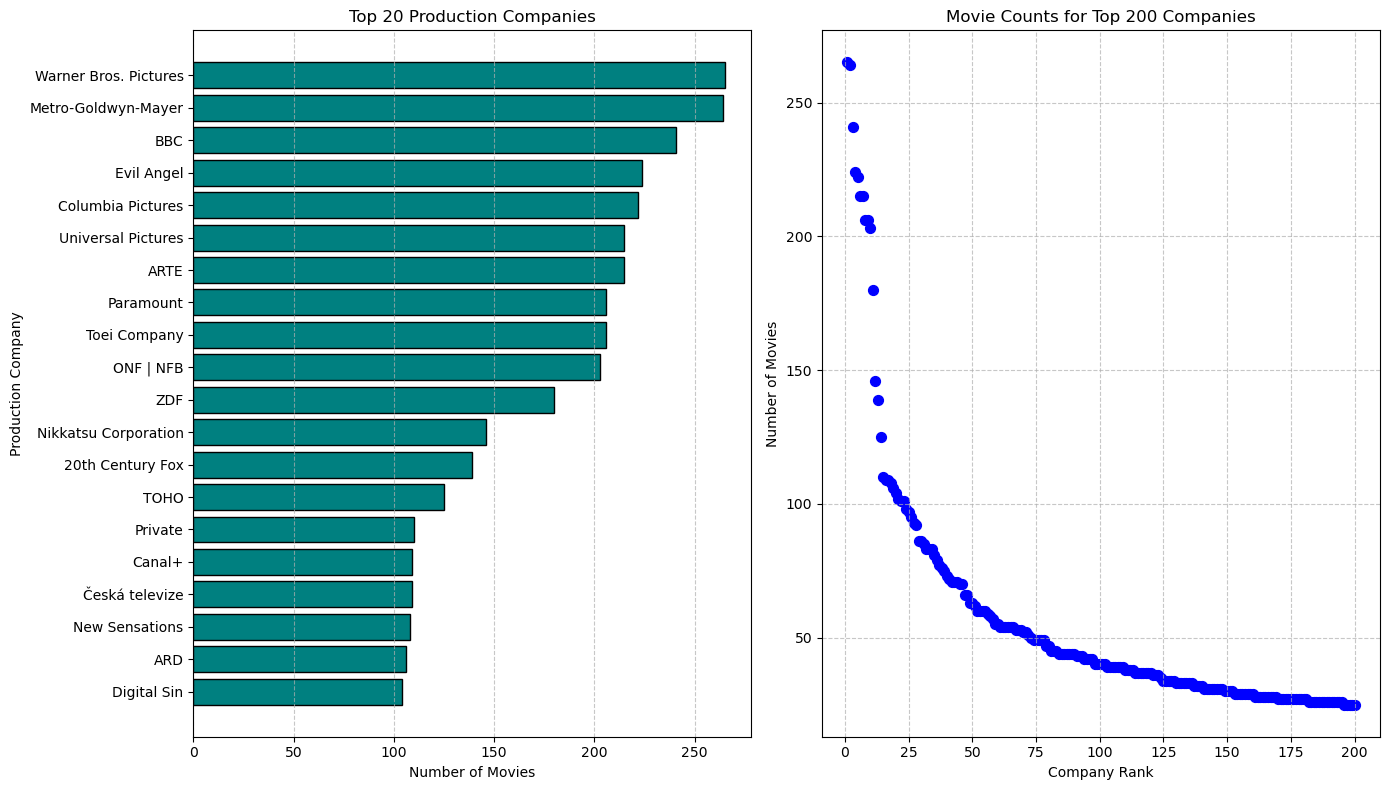

In [ ]:
# ------ Visualizations ------
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

top_n_bar = 20
top_companies_bar = company_counts.head(top_n_bar)
ax1.barh(top_companies_bar['company'], top_companies_bar['movie_count'], color='teal', edgecolor='black')
ax1.set_title(f'Top {top_n_bar} Production Companies')
ax1.set_xlabel('Number of Movies')
ax1.set_ylabel('Production Company')
ax1.invert_yaxis()  # Top company at the top
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)

top_n_scatter = 200
top_companies_scatter = company_counts.head(top_n_scatter)
ranks = range(1, top_n_scatter + 1)
ax2.scatter(ranks, top_companies_scatter['movie_count'], color='blue', s=50)
ax2.set_title(f'Movie Counts for Top {top_n_scatter} Companies')
ax2.set_xlabel('Company Rank')
ax2.set_ylabel('Number of Movies')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()